# Data analysis for predicting housing prices in California

For this analysis we will use "California Housing Prices" dataset from the StatLib repository.

# Data Set information:

This dataset was based on data from the 1990 California census. This data has metrics such as the population, median income, median housing price, and so on for each block group in California. Block groups are the smallest geographical unit for which the US Census Bureau publishes sample data (a block group typically has a population of 600 to 3,000 people). I will refer to these blocks as “districts” for short.



# Some Useful methods and libraries

In [1]:
#Let's import all that will be needed
import os
import tarfile
from six.moves import urllib
import pandas as pd
import numpy as np
from pandas.plotting import scatter_matrix

#Some methods useful for preprocessing
from sklearn.preprocessing import StandardScaler, OneHotEncoder

#Visualization
%matplotlib inline
import matplotlib.pyplot as plt


# We first import the data we will be working with from github

In [3]:
download_root = "https://raw.githubusercontent.com/ageron/handson-ml/master/"
Housing_path = os.path.join("datasets", "housing")
Housing_url = download_root + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=Housing_url, housing_path=Housing_path):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path) #Copies network object into a local file
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

def load_housing_data(housing_path = Housing_path):
    fetch_housing_data()
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)
#We load our data
HousingData = load_housing_data()

In [4]:
HousingData.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


Let's do some data visualization

In [5]:
HousingData[HousingData.median_house_value == 500001]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
89,-122.27,37.80,52.0,249.0,78.0,396.0,85.0,1.2434,500001.0,NEAR BAY
459,-122.25,37.87,52.0,609.0,236.0,1349.0,250.0,1.1696,500001.0,NEAR BAY
493,-122.24,37.86,52.0,1668.0,225.0,517.0,214.0,7.8521,500001.0,NEAR BAY
494,-122.24,37.85,52.0,3726.0,474.0,1366.0,496.0,9.3959,500001.0,NEAR BAY
509,-122.23,37.83,52.0,2990.0,379.0,947.0,361.0,7.8772,500001.0,NEAR BAY
510,-122.22,37.82,39.0,2492.0,310.0,808.0,315.0,11.8603,500001.0,NEAR BAY
511,-122.22,37.82,42.0,2991.0,335.0,1018.0,335.0,13.4990,500001.0,NEAR BAY
512,-122.23,37.82,52.0,3242.0,366.0,1001.0,352.0,12.2138,500001.0,NEAR BAY
514,-122.23,37.82,52.0,3494.0,396.0,1192.0,383.0,12.3804,500001.0,NEAR BAY
517,-122.23,37.82,52.0,1611.0,203.0,556.0,179.0,8.7477,500001.0,NEAR BAY


In [6]:
HousingData.ocean_proximity.value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

We can gain a good insight by analysing the most expensive median_house_value in relation to ocean_proximity

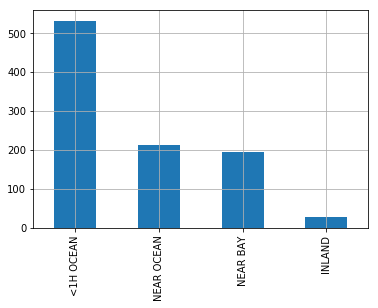

In [7]:
HousingData.ocean_proximity[HousingData.median_house_value == 500001].value_counts().plot(kind = "bar", grid=True)

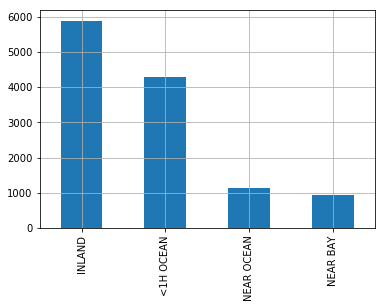

In [8]:
HousingData.ocean_proximity[HousingData.median_house_value < HousingData.median_house_value.mean()].value_counts().plot(kind = "bar", grid=True)

In [9]:
HousingData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [10]:
HousingData.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


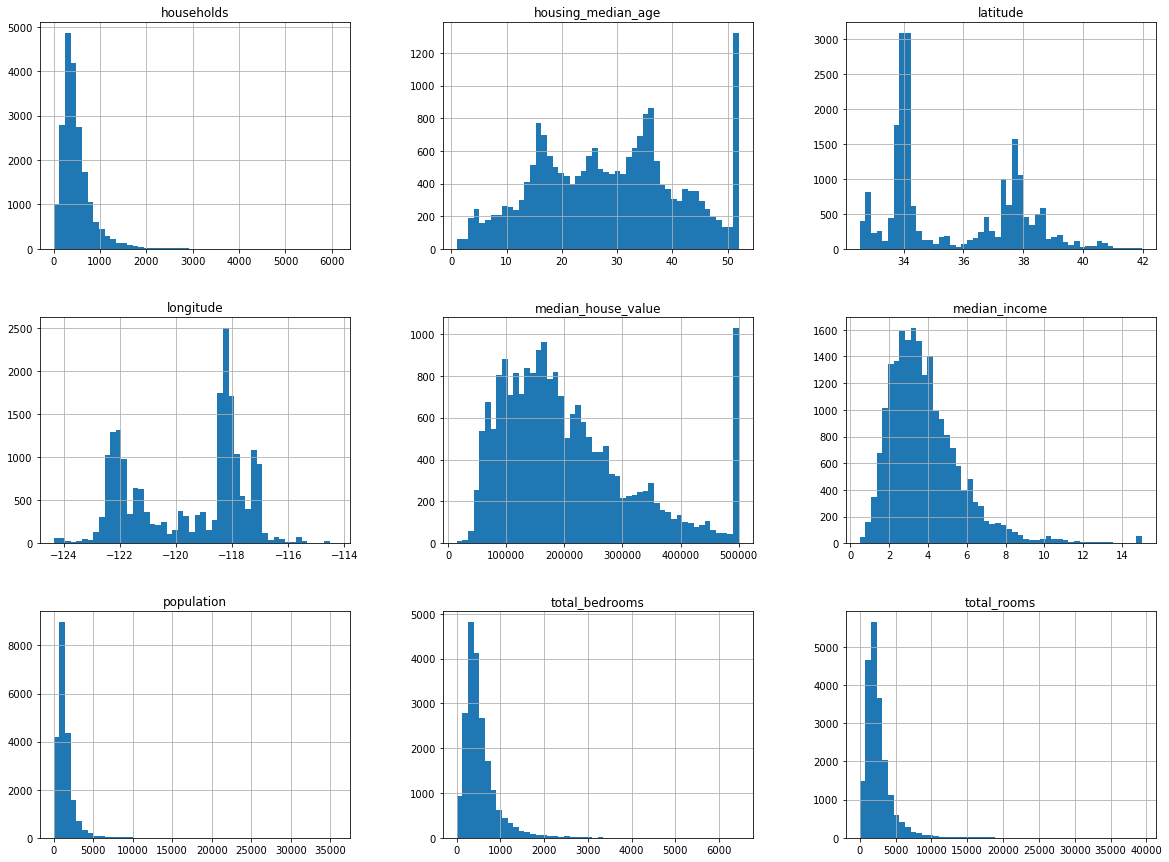

In [11]:
HousingData.hist(bins=50,figsize=(20,15))
plt.show()

Notice that it doesn't include ocean_proximity field since it is a categorial data

* Notice that some attributes are capped.
* Also check that income and median_house_value are scaled (1 represents 10,000 USD). Sometimes data is preprocessed.
* Many histograms are heavy-tailed


In [12]:
Attribute_corr = HousingData.corr()
Attribute_corr.median_house_value.sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

# Data combinations

In some cases by combining different attributes we can get new attributes that may have a better correlation.

In [13]:
HousingData["rooms_per_household"] = HousingData["total_rooms"]/HousingData["households"]
HousingData["bedrooms_per_room"] = HousingData["total_bedrooms"]/HousingData["total_rooms"]
HousingData["population_per_household"]=HousingData["population"]/HousingData["households"]

Attribute_corr_com = HousingData.corr()
Attribute_corr_com.median_house_value.sort_values(ascending=False)

median_house_value          1.000000
median_income               0.688075
rooms_per_household         0.151948
total_rooms                 0.134153
housing_median_age          0.105623
households                  0.065843
total_bedrooms              0.049686
population_per_household   -0.023737
population                 -0.024650
longitude                  -0.045967
latitude                   -0.144160
bedrooms_per_room          -0.255880
Name: median_house_value, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001AD6CAC1E10>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000001AD6C2F2C50>]], dtype=object)

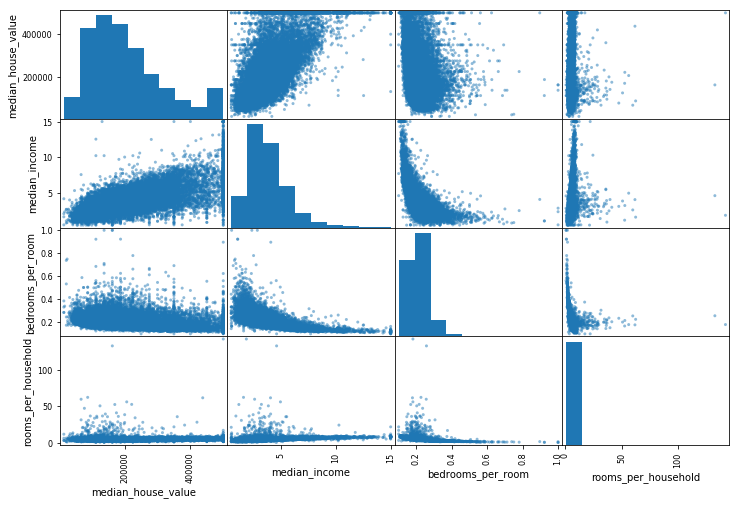

In [14]:
scatter_matrix(HousingData[["median_house_value", "median_income", "bedrooms_per_room","rooms_per_household"]], figsize=(12, 8))

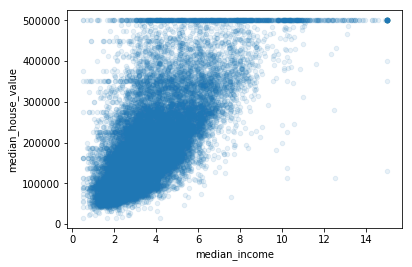

In [15]:
HousingData.plot(kind="scatter", x="median_income", y="median_house_value",alpha=0.1)

If we plot our coordinates

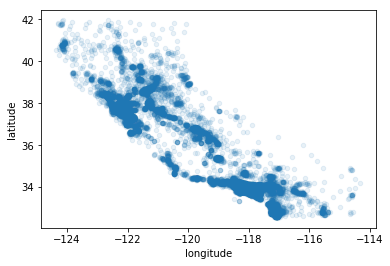

In [16]:
HousingData.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)

We plot them on california image

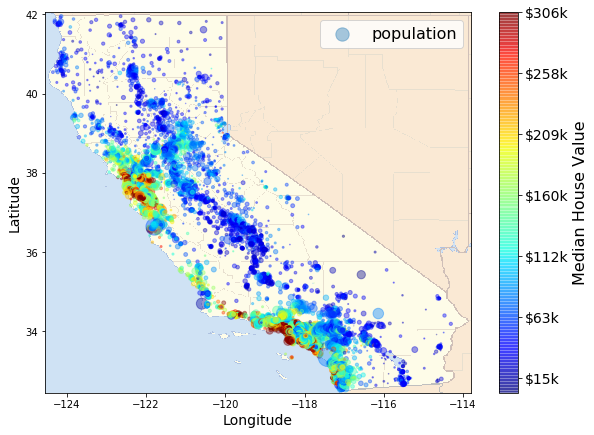

In [17]:
import matplotlib.image as mpimg
california_img=mpimg.imread("california.png")
#Scatter of house prices
ax = HousingData.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
    s=HousingData["population"]/100,label="population",  figsize=(10,7),
    c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=False,
)
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)

#California image as background
plt.imshow(california_img, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.5,
           cmap=plt.get_cmap("jet"))

#Median House value bar
cheapest = HousingData.median_house_value.min()
most_expensive = HousingData.median_house_value.max()
tick_values = np.linspace(cheapest, most_expensive, 11, endpoint=True)
cbar = plt.colorbar()
cbar.ax.set_yticklabels(["$%dk"%(round(v/1000)) for v in tick_values], fontsize=14)
cbar.set_label('Median House Value', fontsize=16)

plt.legend(fontsize=16)
plt.savefig("Housing_prices_Caliornia")
plt.show()